# ООО Мэйнс Лаборатория
## 1. <a id='toc1_'></a>[Machine learning engineer  - тестовое задание, 2024](#toc0_)

## 2. <a id='toc2_'></a>[Формулировка задачи:](#toc0_)

Доступны данные о количестве обращений за медицинской помощью по 50 000 застрахованным ДМС за 2022 год. Требуется на основании характеристик застрахованных и истории их обращений за 2022 год предсказать количество визитов за 2023 год. 

Доступны 2 выборки: 

- train - выборка для обучения и валидации , 50 тыс. застрахованных с проставленными значениями target.
- holdout - выборка для финального замера качества модели. В этой выборке 10 000 застрахованных, истинные значения target скрыты.

Для оценки качества модели будет применяться метрика MSE.

**Содержание**<a id='toc0_'></a>    
1. [Machine learning engineer  - тестовое задание, 2024](#toc1_)    
2. [Формулировка задачи:](#toc2_)    
3. [Доступные данные:](#toc3_)    
4. [План](#toc4_)    
5. [Загрузка](#toc5_)    
6. [Исследовательский анализ](#toc6_)    
6.1. [Введение](#toc6_1_)    
6.2. [insured_pin](#toc6_2_)    
6.3. [insured_network](#toc6_3_)    
6.4. [nationality](#toc6_4_)    
6.5. [gender](#toc6_5_)    
6.6. [date of birth](#toc6_6_)    
6.7. [Relation](#toc6_7_)    
6.8. [diagnoses](#toc6_8_)    
6.9. [has_chronic_disease](#toc6_9_)    
6.10. [exposition_22](#toc6_10_)    
6.11. [number_of_visits_22](#toc6_11_)    
6.12. [number_of_services_22](#toc6_12_)    
6.13. [exposition_23](#toc6_13_)    
6.14. [number_of_visits_23](#toc6_14_)    
6.15. [Заключение](#toc6_15_)    
7. [Предобработка](#toc7_)    
7.1. [Пропуски](#toc7_1_)    
7.1.1. [diagnoses](#toc7_1_1_)    
7.1.2. [age](#toc7_1_2_)    
7.2. [Anomalies](#toc7_2_)    
7.3. [Test split](#toc7_3_)    
7.4. [Конструирование признаков](#toc7_4_)    
7.5. [Заключение](#toc7_5_)    
8. [Обработка признаков](#toc8_)    
8.1. [Введение](#toc8_1_)    
8.2. [Выбор признаков](#toc8_2_)    
8.3. [Обзор](#toc8_3_)    
8.4. [Целочисленные - StandardScaler](#toc8_4_)    
8.5. [Категореальные - OHE](#toc8_5_)    
8.6. [Диагнозы - CountVectorizer](#toc8_6_)    
8.7. [DataFrame - ColumnTransformer](#toc8_7_)    
8.8. [Заключение](#toc8_8_)    
9. [Машинное Обучение](#toc9_)    
9.1. [Определения](#toc9_1_)    
9.2. [Search CV](#toc9_2_)    
9.3. [ LGBM](#toc9_3_)    
9.4. [ XGB](#toc9_4_)    
9.5. [Лучшая модель](#toc9_5_)    
9.6. [Контрольная выборка](#toc9_6_)    
9.7. [Значение признаков](#toc9_7_)    
9.8. [Заключение](#toc9_8_)    
10. [Финальный замер качества](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 3. <a id='toc3_'></a>[Доступные данные:](#toc0_)

**Описание данных:**

- Insured_PIN - уникальный ид застрахованного лица
- Insured_Network - Идентификатор сети клиник доступной для застрахованного. Network - 1 - клиники с наивысшим уровнем сервиса, Network - 8 - клиники с самым базовым уровнем сервиса.
- Nationality - национальность застрахованного.
- Gender - пол застрахованного
- Relation - в качестве кого застраховано данное лицо. self - работник организации, которая оформляет страховку, child - ребенок застрахованного и т.д.
- DoB - дата рождения застрахованного
- Diagnoses - все диагнозы застрахованного за 2022 год
- HasChronicDisease - флаг хронического пациента
- Exposition_22 - количество дней в 2022 году в которые у данного застрахованного действовал полис медицинского страхования. Значение 365 говорит о том, что застрахованный мог обращаться за медицинской помощью весь 2022 год
- number_of_visits_22 - количество дней в 2022 году в которые застрахованный посещал клинику для получения медицинской помощи
- number_of_services_22 - количество оказанных медицинских услуг в 2022 году (консультации, анализы, лекарства и т.д.)
- Exposition_23 - количество дней в 2023 году в которые у данного застрахованного действовал полис медицинского страхования. Значение 365 говорит о том, что застрахованный мог обращаться за медицинской помощью весь 2023 год
- **Target -** number_of_visits_23 - количество дней в 2023 году в которые застрахованный посещал клинику для получения медицинской помощи. **Этот показатель требуется предсказать.**

## 4. <a id='toc4_'></a>[План](#toc0_)

1. Загрузка 
2. Исследовательский анализ
3. Предобработка 
4. Обработка признаков
5. Машинное Обучение
6. Финальный замер качества

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

from timeit import default_timer

from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor - too slow
from lightgbm import LGBMRegressor, plot_importance
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


In [2]:
pd.set_option('display.max_rows', 30) 

RANDOM = 20240804

## 5. <a id='toc5_'></a>[Загрузка](#toc0_)

In [3]:
train = pd.read_excel('ML_train.xlsx', index_col='Insured_PIN')
holdout = pd.read_excel('ML_holdout.xlsx', index_col='Insured_PIN');

In [4]:
train.columns

Index(['Insured_Network', 'Nationality', 'Gender', 'Relation', 'DoB',
       'Diagnoses', 'HasChronicDisease', 'Exposition_22',
       'number_of_visits_22', 'number_of_services_22', 'Exposition_23',
       'number_of_visits_23'],
      dtype='object')

In [5]:
holdout.columns

Index(['Insured_Network', 'Nationality', 'Gender', 'Relation', 'DoB',
       'Diagnoses', 'HasChronicDisease', 'Exposition_22',
       'number_of_visits_22', 'number_of_services_22', 'Exposition_23'],
      dtype='object')

In [6]:
train.index.name = train.index.name.lower()

In [7]:
train.index.name = train.index.name.lower()
train.index.name = train.index.name.lower()
train.columns = train.columns.str.lower()
holdout.columns = holdout.columns.str.lower()
train.rename(columns = {'haschronicdisease' : 'has_chronic_disease'}, inplace=True)
holdout.rename(columns = {'haschronicdisease' : 'has_chronic_disease'}, inplace=True)

In [8]:
train

,insured_network,nationality,gender,relation,dob,diagnoses,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,number_of_visits_23
insured_pin,,,,,,,,,,,,
1006786,Network-4,Group 2,Male,Self,1974-04-28,NaN,0,365,0,0,365,0
1008861,Network-2,Saudi,Female,Child,2017-07-27,J20.9;J02,0,365,1,2,365,4
1019055,Network-5,Group 2,Male,Self,1979-02-20,J03.9,0,365,1,4,365,5
1019438,Network-1,Saudi,Male,Self,1985-05-09,E56.9;J02;J00,1,365,3,18,365,11
1027311,Network-3,Group 3,Male,Self,1962-01-01,NaN,0,365,0,0,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...
987424,Network-4,Saudi,Male,Child,2000-09-15,NaN,0,365,0,0,365,0
991750,Network-3,Group 2,Female,Spouse,1982-05-27,J30.4;R51;J03;UNKRC;N36.3;R69;N81;R10;N39.0;G5...,1,365,22,62,365,16
9932157,Network-5,Group 1,Male,Child,2001-12-27,M50.1;J45.0;K29;R07.4;M25.5;J03;J06.9,0,365,5,19,365,4


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1006786 to 9952098
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   insured_network        50000 non-null  object        
 1   nationality            50000 non-null  object        
 2   gender                 50000 non-null  object        
 3   relation               50000 non-null  object        
 4   dob                    49999 non-null  datetime64[ns]
 5   diagnoses              41226 non-null  object        
 6   has_chronic_disease    50000 non-null  int64         
 7   exposition_22          50000 non-null  int64         
 8   number_of_visits_22    50000 non-null  int64         
 9   number_of_services_22  50000 non-null  int64         
 10  exposition_23          50000 non-null  int64         
 11  number_of_visits_23    50000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usa

In [10]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1516424 to 1384402
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   insured_network        10000 non-null  object        
 1   nationality            10000 non-null  object        
 2   gender                 10000 non-null  object        
 3   relation               10000 non-null  object        
 4   dob                    10000 non-null  datetime64[ns]
 5   diagnoses              8274 non-null   object        
 6   has_chronic_disease    10000 non-null  int64         
 7   exposition_22          10000 non-null  int64         
 8   number_of_visits_22    10000 non-null  int64         
 9   number_of_services_22  10000 non-null  int64         
 10  exposition_23          10000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 937.5+ KB


In [11]:
train.describe(datetime_is_numeric=True)

,dob,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,number_of_visits_23
count,49999,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1990-02-22 19:50:30.036600704,0.337940,358.898960,5.740320,22.477420,355.588420,5.898860
min,1920-03-21 00:00:00,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
25%,1971-03-23 00:00:00,0.000000,365.000000,1.000000,3.000000,365.000000,1.000000
50%,1991-11-13 00:00:00,0.000000,365.000000,4.000000,13.000000,365.000000,4.000000
75%,2011-04-17 00:00:00,1.000000,365.000000,8.000000,31.000000,365.000000,8.000000
max,2022-11-12 00:00:00,1.000000,365.000000,151.000000,962.000000,365.000000,202.000000
std,NaN,0.473013,35.562003,6.592556,29.714146,43.779065,6.856904


In [12]:
train.diagnoses.isnull().sum()

8774

**Вывод:** Данные загружены в две переменные. Колонки приведены к `snake_case`. `holdout` - задержанные данные не рассматривается в деталях во избежании утечки данных. Поскольку ЦП для `holdout` неизвестен, для тестирования модели понадобится разбить данные перед кросс валидацией. Это будет сделано после исследовательского анализа.

Обучающая выборка содержит 13 колонок. В `diagnoses` значительное (20%) количество пропусков. Некоторые признаки, такие как `nationality`, `insured_network` и `relation` вряд ли сыграют большую роль в принятии решений моделью. Кроме того `insured_network` интересна с точки зрения бизнеса поскольку скорее всего повысит выплаты за обслуживание.

## 6. <a id='toc6_'></a>[Исследовательский анализ](#toc0_)

### 6.1. <a id='toc6_1_'></a>[Введение](#toc0_)

В данном разделе только знакомство с признаками, изменение данных будет проведено в следующем

In [13]:
def target_breakdown(feature: str, df=train, head=20): # quick print for number of visits in 22 and 23 based on a feature name (string)
    return pd. concat(
    [df[feature].value_counts(normalize=True) * 100,
    df[feature].value_counts(),
    df['number_of_visits_22'].groupby(df[feature]).mean(),
    df['number_of_visits_23'].groupby(df[feature]).mean()],
      axis = 1, keys = ['percentage', 'total', 'visits_mean_22', 'visits_mean_23']).head(head) \
        .style.set_caption(feature) \
        .set_table_styles([{
            'selector': 'caption',
            'props': [('font-weight', 'bold')]
            }])

In [14]:
def target_corr(feature:str): # correlation number of visits in 22 and 23 based on a feature name (string)
    return pd.DataFrame(train[[feature, 'number_of_visits_22', 'number_of_visits_23']].corr()[feature].drop(feature)).rename(columns={feature:'corr with '+feature})

**Вывод:** Функции позволяют быстро оценить распределение и корреляцию с ЦП.

### 6.2. <a id='toc6_2_'></a>[insured_pin](#toc0_)

In [15]:
train.index.append(holdout.index).duplicated().sum()


0

**Corollary:** Дубликатов нет. Первичный ключ приемлем.

### 6.3. <a id='toc6_3_'></a>[insured_network](#toc0_)

In [16]:
train['insured_network'].unique()

array(['Network-4', 'Network-2', 'Network-5', 'Network-1', 'Network-3',
       'Network-6', 'Network-7', 'Network-8'], dtype=object)

In [17]:
target_breakdown('insured_network')

,percentage,total,visits_mean_22,visits_mean_23
Network-2,93.114000,46557,5.789226,5.937947
Network-1,2.930000,1465,6.772696,6.943345
Network-4,1.922000,961,4.071800,4.480749
Network-5,1.132000,566,3.379859,3.927562
Network-3,0.560000,280,5.017857,5.203571
Network-6,0.242000,121,1.834711,1.785124
Network-7,0.088000,44,2.477273,2.454545
Network-8,0.012000,6,0.500000,1.333333


In [18]:
train['number_of_visits_23'].groupby(train['insured_network'] == 'Network-2').mean()

insured_network
False    5.370317
True     5.937947
Name: number_of_visits_23, dtype: float64

**Вывод:** Огромный дисбаланс классов здесь представляет проблему - даже если категория интересна с точки зрения МО, она может создать проблемы если будущие данные имеют другое распределение.

### 6.4. <a id='toc6_4_'></a>[nationality](#toc0_)

In [19]:
train['nationality'].unique()

array(['Group 2', 'Saudi', 'Group 3', 'Group 4', 'Others', 'Group 1'],
      dtype=object)

In [20]:
target_breakdown('nationality')

,percentage,total,visits_mean_22,visits_mean_23
Saudi,93.392000,46696,5.758202,5.921321
Group 2,2.798000,1399,4.690493,4.857756
Group 3,2.224000,1112,6.449640,6.468525
Group 4,0.614000,307,6.410423,6.833876
Others,0.494000,247,6.902834,6.311741
Group 1,0.478000,239,3.029289,3.326360


In [21]:
train['number_of_visits_23'].groupby(train['nationality'] == 'Saudi').mean()

nationality
False    5.581416
True     5.921321
Name: number_of_visits_23, dtype: float64

In [22]:
train['insured_network'][train['nationality'] == 'Saudi'].value_counts(normalize=True) * 100

Network-2    96.083176
Network-1     2.317115
Network-4     1.190680
Network-3     0.207727
Network-5     0.197019
Network-7     0.002142
Network-8     0.002142
Name: insured_network, dtype: float64

**Вывод:**  Большинство застрахованных - Саудовцы. Сложно понять как это признак повлияет на ЦП, и также как и с `network_id` представлен высокий уровень дисбаланса, но сложно оправдать балансировку классов, учитывая низкое количество записей вне основной категории. 

Среди Саудовцев чуть больше клиентов `Network-2`, не не полное пересечение классов, это повышает шансы, что дисбаланс классов не является ошибкой данных.

### 6.5. <a id='toc6_5_'></a>[gender](#toc0_)

In [23]:
train['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
target_breakdown('gender')

,percentage,total,visits_mean_22,visits_mean_23
Male,51.168000,25584,5.438360,5.580128
Female,48.832000,24416,6.056725,6.232839


**Вывод:** Количество мужчин и женщин близкое к равному. Балансирование классов не требуется. Есть небольшая разница в среднем значении ЦП между полами. Возможно моделирование полов отдельно повысит качество модели.

### 6.6. <a id='toc6_6_'></a>[date of birth](#toc0_)

In [25]:
train['dob'].describe(datetime_is_numeric=True)

count                            49999
mean     1990-02-22 19:50:30.036600704
min                1920-03-21 00:00:00
25%                1971-03-23 00:00:00
50%                1991-11-13 00:00:00
75%                2011-04-17 00:00:00
max                2022-11-12 00:00:00
Name: dob, dtype: object

In [26]:
age = (2023 - train['dob'].dt.year).rename('age')
age.describe()

count    49999.000000
mean        33.365907
std         22.741768
min          1.000000
25%         12.000000
50%         32.000000
75%         52.000000
max        103.000000
Name: age, dtype: float64

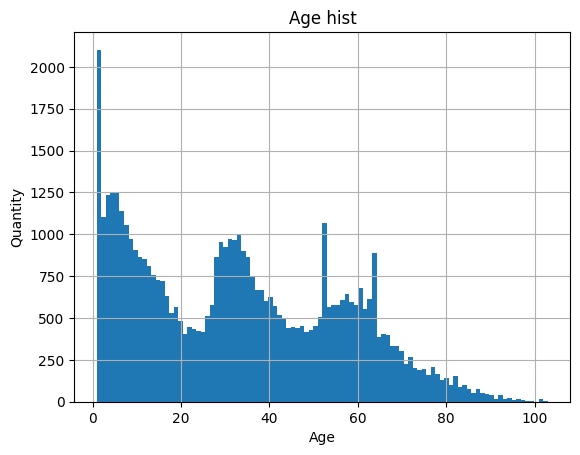

In [27]:
age.hist(bins=100)
plt.title('Age hist')
plt.ylabel('Quantity')
plt.xlabel('Age');

In [28]:
train[train['dob'].isnull()]

,insured_network,nationality,gender,relation,dob,diagnoses,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,number_of_visits_23
insured_pin,,,,,,,,,,,,
1451433,Network-2,Saudi,Male,Self,NaT,H93.1;A09.9;R10;N39.0;M79;E78.5;N77.1;M23;E11....,1,365,15,62,365,14


In [29]:
train[(train['dob'] > '2008') & (train.relation != 'Child')]

,insured_network,nationality,gender,relation,dob,diagnoses,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,number_of_visits_23
insured_pin,,,,,,,,,,,,
2622146,Network-1,Saudi,Male,Self,2011-02-06,J03;J00,1,365,2,3,365,3
4231556,Network-2,Saudi,Female,Spouse,2011-01-26,NaN,0,365,0,0,365,1
86461104,Network-1,Saudi,Male,Other,2008-07-04,E14.11;E55;E10;K90.9;A09.9;J20;A09;E11,1,365,14,90,365,25


In [30]:
train[(train['dob'] < '1932')].relation.value_counts()

Self      136
Parent      1
Name: relation, dtype: int64

In [31]:
age_target = pd.concat([
    age,
    train['number_of_visits_22'],
    train['number_of_visits_23']
    ], axis=1, keys=['age', 'number_of_visits_22', 'number_of_visits_23'])

pd.DataFrame(age_target.corr()['age'].drop('age')).rename(columns={'age':'corr with age'})

,corr with age
number_of_visits_22,0.069100
number_of_visits_23,0.090506


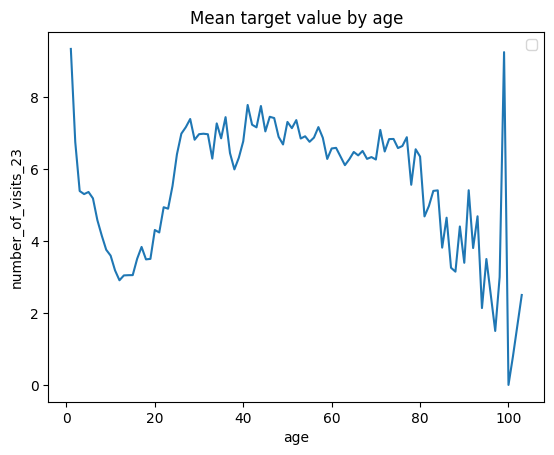

In [32]:
age_target.groupby('age').mean().plot( y='number_of_visits_23')
plt.title('Mean target value by age')
plt.legend('')
plt.ylabel('number_of_visits_23');

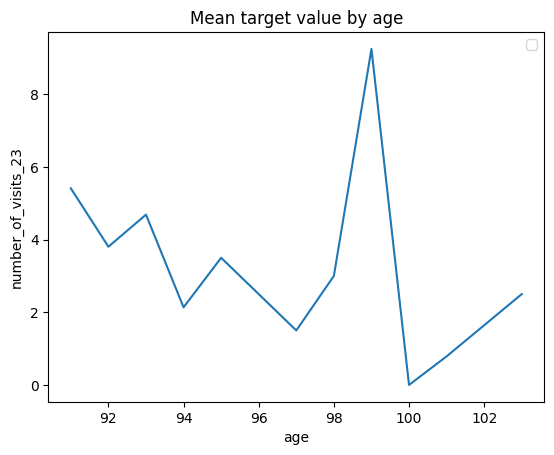

In [33]:
age_target[age_target['age'] > 90].groupby('age').mean().plot( y='number_of_visits_23')
plt.title('Mean target value by age')
plt.legend('')
plt.ylabel('number_of_visits_23');

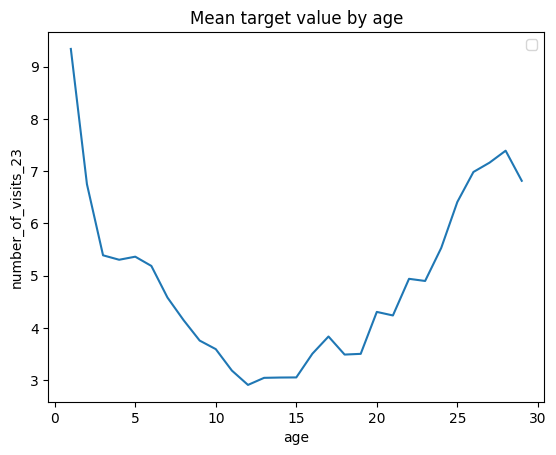

In [34]:
age_target[age_target['age'] < 30].groupby('age').mean().plot( y='number_of_visits_23')
plt.title('Mean target value by age')
plt.legend('')
plt.ylabel('number_of_visits_23');

In [35]:
pd.concat(
    [pd.concat([
        pd.qcut(age, 20),
        train['number_of_visits_23']
        ],axis=1, keys=['age_bin', 'number_of_visits_23']).groupby('age_bin').mean(),
     pd.qcut(age, 20).value_counts()
    ], axis=1).rename(columns={'age':'quantity'}).style.set_caption('QCUT 20')

,number_of_visits_23,quantity
"(0.999, 3.0]",7.059576,3206
"(3.0, 5.0]",5.333872,2477
"(5.0, 7.0]",4.897993,2392
"(7.0, 9.0]",3.961045,2028
"(9.0, 12.0]",3.235831,2629
"(12.0, 15.0]",3.048780,2296
"(15.0, 20.0]",3.704499,2934
"(20.0, 25.0]",5.204342,2119
"(25.0, 29.0]",7.085370,2905
"(29.0, 32.0]",6.973427,2860


In [36]:
pd.concat(
    [pd.concat([
        pd.cut(age, 20),
        train['number_of_visits_23']
        ],axis=1, keys=['age_bin', 'number_of_visits_23']).groupby('age_bin').mean(),
     pd.cut(age, 20).value_counts()
    ], axis=1).rename(columns={'age':'quantity'}).style.set_caption('CUT 20')

,number_of_visits_23,quantity
"(0.898, 6.1]",6.104815,6936
"(6.1, 11.2]",3.900223,4941
"(11.2, 16.3]",3.103252,3874
"(16.3, 21.4]",3.841622,2614
"(21.4, 26.5]",5.787607,2227
"(26.5, 31.6]",7.049196,4289
"(31.6, 36.7]",6.934792,4478
"(36.7, 41.8]",6.632438,3126
"(41.8, 46.9]",7.321398,2346
"(46.9, 52.0]",7.145613,2747


**Вывод:** Есть один пропуск, скорее всего безопасно заменить средним из выборки с похожими признаками. Есть некоторые аномалии в данные при краевых значениях возраста, но их сложно объяснить без дополнительной информации и лучше оставить как есть.

В отношении возраста, 75% застрахованных моложе 52 лет. Есть падения в количестве застрахованных на графике распределения возраста около 22 и 45 лет, возможно связано с тем что дети и родители ниже и выше этого возраста соответственно. Нет корреляции между возрастом и ЦП, но возможно комбинация признаков включая возраст, диагноз и другие будут полезны в предсказании. Можно заметить что среди очень маленьких детей больше всего визитов, похожая ситуация с пожилыми людьми, но сложно быть уверенным во втором случае из-за низкого количества записей. Может быть полезно создать признаки для возрастных категорий, особенно для младенцев и маленьких детей, т.к эти группы имеют наиболее выраженное отклонение от среднего.

### 6.7. <a id='toc6_7_'></a>[Relation](#toc0_)

In [37]:
train['relation'].unique()

array(['Self', 'Child', 'Spouse', 'Parent', 'Other'], dtype=object)

In [38]:
pd.concat([age, train.relation], axis=1).pivot_table(index='relation', margins=True)

,age
relation,
Child,10.307857
Other,42.384615
Parent,68.637681
Self,52.306393
Spouse,37.493052
All,33.365907


In [39]:
target_breakdown('relation')

,percentage,total,visits_mean_22,visits_mean_23
Self,43.678000,21839,6.017034,6.366500
Child,39.148000,19574,4.570808,4.531011
Spouse,16.984000,8492,7.663095,7.806406
Parent,0.138000,69,11.028986,9.869565
Other,0.052000,26,11.730769,9.307692


**Вывод:** Возможно уместно учесть влияние данной категории на прибыль, но без дополнительной информации об условиях страховки это сложно сделать. Родители и дети значительно отличаются возрастом от среднего. Примечательно, что большое количество детей склоняет возраст ниже большинства категорий.
Я подозреваю что эту категорию можно безопасно отбросить, т.к. она будет иметь низкое влияние на количество посещений из-за того что возраст известен для практически всех застрахованных.

### 6.8. <a id='toc6_8_'></a>[diagnoses](#toc0_)

In [40]:
train.diagnoses

insured_pin
1006786                                                  NaN
1008861                                            J20.9;J02
1019055                                                J03.9
1019438                                        E56.9;J02;J00
1027311                                                  NaN
                                 ...                        
987424                                                   NaN
991750     J30.4;R51;J03;UNKRC;N36.3;R69;N81;R10;N39.0;G5...
9932157                M50.1;J45.0;K29;R07.4;M25.5;J03;J06.9
9950431    R69;N39.0;I10;J02.9;E78.0;J02;E11;E55.9;E09.21...
9952098                                                  J06
Name: diagnoses, Length: 50000, dtype: object

In [41]:
train.diagnoses.unique().size

35467

In [42]:
diagnoses_as_lists = train.diagnoses.fillna('no_diagnoses').str.lower().str.split(';')
diagnoses_as_lists

insured_pin
1006786                                       [no_diagnoses]
1008861                                         [j20.9, j02]
1019055                                              [j03.9]
1019438                                    [e56.9, j02, j00]
1027311                                       [no_diagnoses]
                                 ...                        
987424                                        [no_diagnoses]
991750     [j30.4, r51, j03, unkrc, n36.3, r69, n81, r10,...
9932157        [m50.1, j45.0, k29, r07.4, m25.5, j03, j06.9]
9950431    [r69, n39.0, i10, j02.9, e78.0, j02, e11, e55....
9952098                                                [j06]
Name: diagnoses, Length: 50000, dtype: object

In [43]:
diagnoses_as_lists.explode().unique().size

6225

In [44]:
any(diagnoses_as_lists.map(len) != diagnoses_as_lists.map(lambda x: len(set(x))))

False

In [45]:
train[['number_of_services_22', 'number_of_visits_22', 'number_of_visits_23']].groupby(train.diagnoses.isna()).mean()

,number_of_services_22,number_of_visits_22,number_of_visits_23
diagnoses,,,
False,27.261219,6.962014,6.849391
True,0.000000,0.000000,1.432642


In [46]:
diagnoses_counts = pd.concat([
    diagnoses_as_lists[~diagnoses_as_lists.map(lambda x: x == ['no_diagnoses'])].map(len),
    pd.Series(0, train.index[train.diagnoses.isna()])
]).rename('diagnoses_counts')
target_breakdown('diagnoses_counts', pd.concat([train, diagnoses_counts], axis=1))

,percentage,total,visits_mean_22,visits_mean_23
0,17.548000,8774,0.000000,1.432642
1,10.518000,5259,1.180262,2.647081
2,9.908000,4954,2.202463,3.361930
3,8.648000,4324,3.251156,4.222017
4,7.914000,3957,4.352793,5.067728
5,6.778000,3389,5.372676,5.694895
6,5.988000,2994,6.306279,6.464930
7,5.024000,2512,7.233280,6.933917
8,4.342000,2171,8.216029,7.846154
9,3.718000,1859,9.235073,8.601937


In [47]:
train[['number_of_services_22', 'number_of_visits_22', 'number_of_visits_23']].corrwith(diagnoses_counts)

number_of_services_22    0.828579
number_of_visits_22      0.861860
number_of_visits_23      0.608565
dtype: float64

In [48]:
train[['number_of_services_22', 'number_of_visits_22', 'number_of_visits_23']].groupby(train.diagnoses.isna()).mean()

,number_of_services_22,number_of_visits_22,number_of_visits_23
diagnoses,,,
False,27.261219,6.962014,6.849391
True,0.000000,0.000000,1.432642


**Вывод:** Учитывая полное отсутствие визитов и услуг в 22 у людей с пропусками в этой категории, логично предположить что это люди не болели в 22 году. Таким образом можно заполнить пропуски заглушкой отражающей этот факт. Кроме того это подсказывает возможность использовать данный признак для того чтобы посчитать диагнозы в 22 и вывести это значение в отдельный столбец. Корреляция этого значения с `number_of_visits_23` довольно высокая, настолько высокая что вызывает опасения о мультиколлинеарности с `number_of_visits_22` и `number_of_services_22`.

С другой стороны, при использовании этого значение как текста, возникает серьёзный вызов с точки зрения машинного обучения, из-за большого количества уникальных диагнозов. Самый простой способ - использовать каждый как уникальный булев признак. Возможно это будет улучшено, если использовать обратную частоту в документе для определения редких значений. Если это удастся сделать появится возможность связывать отдельные болезни с количеством визитов. Недостатком такого подхода является большое количество признаков.

В случае проблем с вычислительными мощностями, можно попробовать сократить размерность матрицы признаков, однако это приведёт к некоторой потере данных и возможности интерпретировать их. С другой стороны если ресурсы не ограничены можно попробовать рассмотреть совпадения заболеваний и их влияние на ЦП, возможно улучшив точность.

### 6.9. <a id='toc6_9_'></a>[has_chronic_disease](#toc0_)

In [49]:
train['has_chronic_disease'].unique()

array([0, 1], dtype=int64)

In [50]:
target_breakdown('has_chronic_disease')

,percentage,total,visits_mean_22,visits_mean_23
0,66.206000,33103,3.254176,4.016131
1,33.794000,16897,10.610937,9.587323


**Вывод:** Очень полезный признак, скорее всего сыграет важную роль в предсказании ЦП. Уместно сменить тип данных на булев, учитывая что это бинарный флажок. С точки зрения бизнеса представляет некоторую проблему, т.к. многие страховщики сомневаются в оформлении контракта с людьми болеющими хроническими заболеваниями, кроме того может быть подвержена влиянию законодательства в некоторых юрисдикциях.

### 6.10. <a id='toc6_10_'></a>[exposition_22](#toc0_)

In [51]:
train['exposition_22'].describe()

count    50000.000000
mean       358.898960
std         35.562003
min         50.000000
25%        365.000000
50%        365.000000
75%        365.000000
max        365.000000
Name: exposition_22, dtype: float64

In [52]:
train['exposition_22'].value_counts().head(5)

365    48153
61        26
122       25
364       23
196       21
Name: exposition_22, dtype: int64

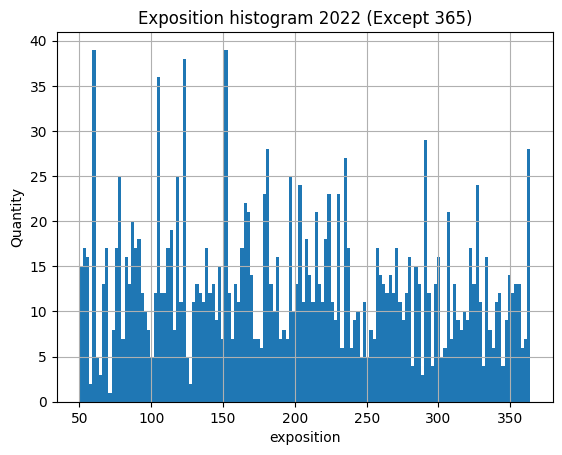

In [53]:
train['exposition_22'][train['exposition_22'] < 365].hist(bins=140)
plt.title('Exposition histogram 2022 (Except 365)')
plt.xlabel('exposition')
plt.ylabel('Quantity');

In [54]:
target_corr('exposition_22')

,corr with exposition_22
number_of_visits_22,0.060615
number_of_visits_23,-0.045779


In [55]:
pd.DataFrame(train[['exposition_22', 'number_of_visits_22', 'number_of_visits_23']][train['exposition_22'] < 365].corr()['exposition_22'].drop('exposition_22')) \
    .rename(columns={'exposition_22':'corr with exposition_22 for values below 365'})

,corr with exposition_22 for values below 365
number_of_visits_22,0.358111
number_of_visits_23,-0.025974


In [56]:
train['number_of_visits_22'].groupby(train['exposition_22'] == 365).mean()

exposition_22
False    4.365457
True     5.793055
Name: number_of_visits_22, dtype: float64

**Вывод:** Учитывая что меньше 10% периода страхования меньше одного года сложно сказать что признак полезен. Заметно, что среднии визиты в 22 больше для людей с круглогодовой страховкой, но, из-за дисбаланса, сложно говорить об этом с уверенностью. В целом признак весьма информативен для `number_of_visits_22`, но не для  `number_of_visits_23`. Корреляция не достаточно высока чтобы создать проблему, но возможно стоит его не использовать

### 6.11. <a id='toc6_11_'></a>[number_of_visits_22](#toc0_)

In [57]:
train['number_of_visits_22'].describe()

count    50000.000000
mean         5.740320
std          6.592556
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        151.000000
Name: number_of_visits_22, dtype: float64

In [58]:
train['number_of_visits_22'].value_counts().head(10)

0    8774
1    5714
2    5024
3    4372
4    3738
5    3308
6    2794
7    2428
8    2060
9    1774
Name: number_of_visits_22, dtype: int64

In [59]:
print('Correlation between number of visits in 2022 and 2023')
train['number_of_visits_22'].corr(train['number_of_visits_23'])

Correlation between number of visits in 2022 and 2023


0.6754298976518944

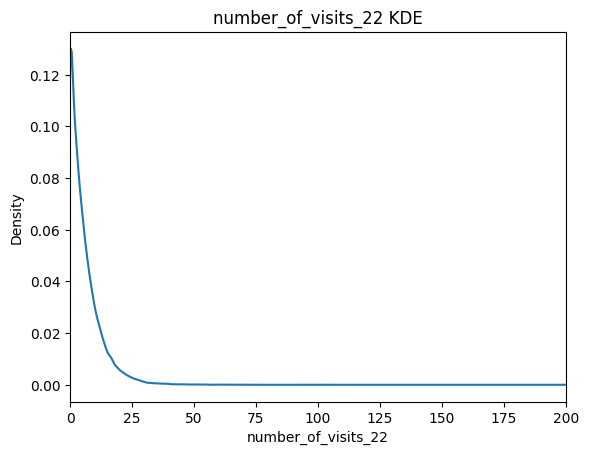

In [60]:
train['number_of_visits_22'].plot.kde()
plt.title('number_of_visits_22 KDE')
plt.xlabel('number_of_visits_22')
plt.xlim((0,200));


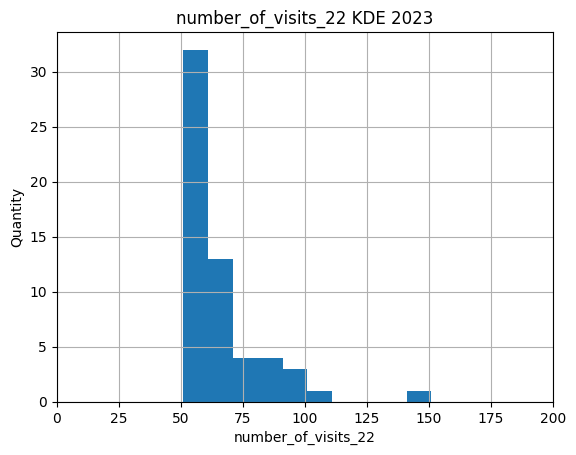

In [61]:
train['number_of_visits_22'][train['number_of_visits_22'] > 50].hist()
plt.title('number_of_visits_22 KDE 2023')
plt.xlabel('number_of_visits_22')
plt.ylabel('Quantity')
plt.xlim((0,200));

In [62]:
train[train['number_of_visits_22'] > 125]

,insured_network,nationality,gender,relation,dob,diagnoses,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,number_of_visits_23
insured_pin,,,,,,,,,,,,
1419016,Network-2,Saudi,Male,Self,1946-05-31,R52.9;K29.1;E13.52;M54.5;E10.42;I87.2;I95.9;A4...,1,365,151,962,365,202


**Вывод:** Очень информативен, даже если учитывать только корреляцию. Есть выброс, скорее всего стоит удалить.

### 6.12. <a id='toc6_12_'></a>[number_of_services_22](#toc0_)

In [63]:
train['number_of_services_22'].describe()

count    50000.000000
mean        22.477420
std         29.714146
min          0.000000
25%          3.000000
50%         13.000000
75%         31.000000
max        962.000000
Name: number_of_services_22, dtype: float64

In [64]:
train['number_of_services_22'].value_counts().head(10)

0     8774
2     1720
4     1595
3     1540
5     1432
6     1375
7     1308
8     1299
9     1222
10    1116
Name: number_of_services_22, dtype: int64

In [65]:
target_corr('number_of_services_22')

,corr with number_of_services_22
number_of_visits_22,0.875023
number_of_visits_23,0.613905


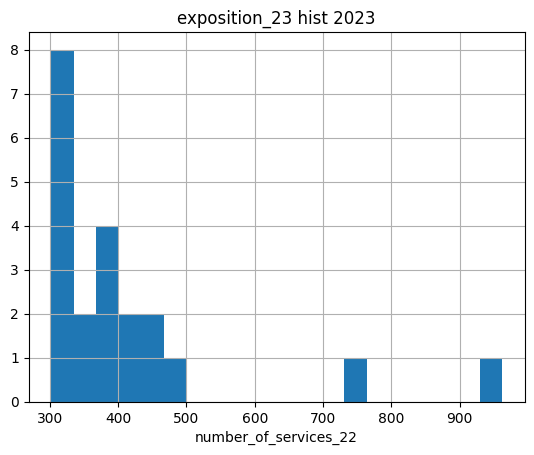

In [66]:
train['number_of_services_22'][train['number_of_services_22'] > 300].hist(bins = 20)
plt.title('exposition_23 hist 2023')
plt.xlabel('number_of_services_22');


In [67]:
train[train['number_of_services_22'] > 700]

,insured_network,nationality,gender,relation,dob,diagnoses,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,number_of_visits_23
insured_pin,,,,,,,,,,,,
1419016,Network-2,Saudi,Male,Self,1946-05-31,R52.9;K29.1;E13.52;M54.5;E10.42;I87.2;I95.9;A4...,1,365,151,962,365,202
1431423,Network-2,Saudi,Male,Self,1978-04-24,G62.9;E27.3;E11;E03;H16.0;M79.66;R06.0;M25.5;J...,0,365,104,754,365,140


**Вывод:** Также как и `exposition_22` для `number_of_visits_22`, данный признак очень информативен для своего года, настолько что представляет угрозу мультиколлинеарности с `number_of_visits_22`. Сохранение его скорее всего не даст лучших результатов чем просто использование `number_of_visits_22`.

Два выброса, один старый. Стоит удалить.

### 6.13. <a id='toc6_13_'></a>[exposition_23](#toc0_)

In [68]:
train['exposition_23'].describe()

count    50000.000000
mean       355.588420
std         43.779065
min         50.000000
25%        365.000000
50%        365.000000
75%        365.000000
max        365.000000
Name: exposition_23, dtype: float64

In [69]:
train['exposition_23'].value_counts().head(10)

365    47278
211      111
156      110
268       99
207       92
206       84
301       78
147       78
78        73
238       66
Name: exposition_23, dtype: int64

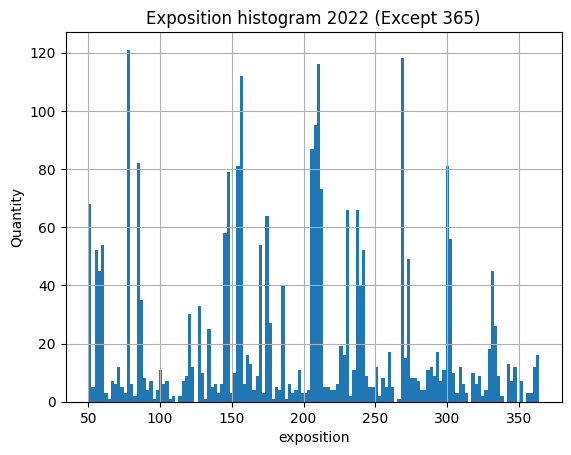

In [70]:
train['exposition_23'][train['exposition_23'] < 365].hist(bins=140)
plt.title('Exposition histogram 2022 (Except 365)')
plt.xlabel('exposition')
plt.ylabel('Quantity');

In [71]:
print('Correlation between exposure and visits in 2023')
train['exposition_23'].corr(train['number_of_visits_23'])

Correlation between exposure and visits in 2023


0.11764494226561621

In [72]:
print('Correlation between exposure (<365) and visits in 2023')
train['exposition_23'][train['exposition_23'] < 365].corr(train['number_of_visits_23'])

Correlation between exposure (<365) and visits in 2023


0.14362665334899222

In [73]:
train['number_of_visits_23'].groupby(train['exposition_23'] == 365).mean()

exposition_23
False    2.372888
True     6.101866
Name: number_of_visits_23, dtype: float64

**Вывод:** Корреляция с визитами ниже чем в случае 2022 года, на в целом это полезный признак. В отличии от 2022, люди с круглогодовой страховкой имеет среднее значение ЦП в 3 раза выше чем остальные.

### 6.14. <a id='toc6_14_'></a>[number_of_visits_23](#toc0_)

In [74]:
train['number_of_visits_23'].describe()

count    50000.000000
mean         5.898860
std          6.856904
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        202.000000
Name: number_of_visits_23, dtype: float64

In [75]:
train['number_of_visits_23'].value_counts().head(10)

0    8525
1    5592
2    4931
3    4515
4    3773
5    3289
6    2847
7    2304
8    2063
9    1706
Name: number_of_visits_23, dtype: int64

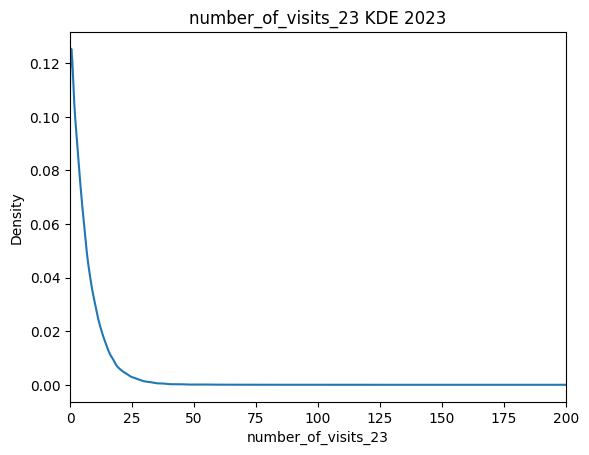

In [76]:
train['number_of_visits_23'].plot.kde()
plt.title('number_of_visits_23 KDE 2023')
plt.xlabel('number_of_visits_23')
plt.xlim((0,200));

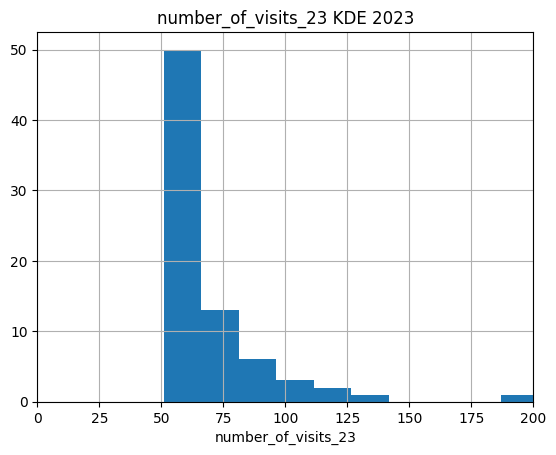

In [77]:
train['number_of_visits_23'][train['number_of_visits_23'] > 50].hist()
plt.title('number_of_visits_23 KDE 2023')
plt.xlabel('number_of_visits_23')
plt.xlim((0,200));

In [78]:
train[train['number_of_visits_23'] > 150]

,insured_network,nationality,gender,relation,dob,diagnoses,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,number_of_visits_23
insured_pin,,,,,,,,,,,,
1419016,Network-2,Saudi,Male,Self,1946-05-31,R52.9;K29.1;E13.52;M54.5;E10.42;I87.2;I95.9;A4...,1,365,151,962,365,202


**Вывод:** Целевой признак также имеет тот же выброс, что и `number_of_visits_22`, что подтверждает необходимость его отбросить.


### 6.15. <a id='toc6_15_'></a>[Заключение](#toc0_)

В целом данные качественные, 20% отсутствующих диагнозов скорее всего вызваны технической ошибкой при переносе данных без диагнозов. Некоторые аномалии лучше отбросить для ручной обработки.

Признаки `nationality` и `insured_network` плохо сбалансированы, подавляющие большинство - саудовцы с доступом к `Network-2`, но нет полного пересечения категорий. Классы не имеет смысл балансировать, не ясно стоит ли вообще использовать эти признаки.

`Gender` имеет хороший баланс, учитывая контекст возможно имеет смысл разбить задание на несколько моделей - мужчины, женщины и дети отдельно.

`Relation` не представляет проблем и содержит полезную бизнесу информацию, но не до конца понятно как этот признак повлияет на модель.

Возраст, хронические заболевания и числовые признаки весьма полезны и информативны, но `number_of_services_22` имеет 87% корреляцию с  `number_of_visists_22`, что скорее всего вызовет проблемы с мультиколлинеарностью.

И наконец `diagnoses` представляет главный вызов, т.к. каждый пациент имеет уникальный набор заболеваний. Учитывая, что определение заболеваний вероятнее всего повышающих поход к врачу полезно для компании, данный признак стоит сохранить.

## 7. <a id='toc7_'></a>[Предобработка](#toc0_)

### 7.1. <a id='toc7_1_'></a>[Пропуски](#toc0_)

#### 7.1.1. <a id='toc7_1_1_'></a>[diagnoses](#toc0_)

In [79]:
train.diagnoses.fillna('no_diagnoses', inplace=True)
holdout.diagnoses.fillna('no_diagnoses', inplace=True)

#### 7.1.2. <a id='toc7_1_2_'></a>[age](#toc0_)

In [80]:
train[train.dob.isnull()]

,insured_network,nationality,gender,relation,dob,diagnoses,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,number_of_visits_23
insured_pin,,,,,,,,,,,,
1451433,Network-2,Saudi,Male,Self,NaT,H93.1;A09.9;R10;N39.0;M79;E78.5;N77.1;M23;E11....,1,365,15,62,365,14


In [81]:
age = (2023 - train['dob'].dt.year).rename('age') # duplicated for convinience
age.describe()

count    49999.000000
mean        33.365907
std         22.741768
min          1.000000
25%         12.000000
50%         32.000000
75%         52.000000
max        103.000000
Name: age, dtype: float64

In [82]:
age.isna().sum()

1

In [83]:
dob_mean = pd.to_datetime(
    (2023 - pd.concat([train, age], axis=1) \
     .groupby(['nationality', 'gender', 'relation', 'has_chronic_disease']).mean()['age']),
    format='%Y').rename('dob_average')
dob_mean

nationality  gender  relation  has_chronic_disease
Group 1      Female  Spouse    0                     1985-01-01
                               1                     1982-01-01
             Male    Child     0                     2011-01-01
                     Self      0                     1982-01-01
                               1                     1978-01-01
                                                        ...    
Saudi        Male    Parent    1                     1951-01-01
                     Self      0                     1972-01-01
                               1                     1976-01-01
                     Spouse    0                     1984-01-01
                               1                     1987-01-01
Name: dob_average, Length: 71, dtype: datetime64[ns]

In [84]:
def dob_sample_mean(sample): # could do fillna instead, but inplace inside a function seems unsafe
    return sample.merge(dob_mean, how='left',
                        on=['nationality', 'gender', 'relation', 'has_chronic_disease']).set_index(sample.index)['dob_average']

In [85]:
train.dob.fillna(dob_sample_mean(train), inplace=True)
holdout.dob.fillna(dob_sample_mean(train), inplace=True)

In [86]:
train.isna().sum().sum()

0

In [87]:
holdout.isna().sum().sum()

0

**Вывод:** `diagnoses` пропуски заполнены заглушкой. Для `dob`  составлен алгоритм заполнения средним из `train` по совпадению пола, национальности, наличия хронических заболеваний и `relation`.

### 7.2. <a id='toc7_2_'></a>[Anomalies](#toc0_)

In [88]:
train[train['number_of_services_22'] > 700]

,insured_network,nationality,gender,relation,dob,diagnoses,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,number_of_visits_23
insured_pin,,,,,,,,,,,,
1419016,Network-2,Saudi,Male,Self,1946-05-31,R52.9;K29.1;E13.52;M54.5;E10.42;I87.2;I95.9;A4...,1,365,151,962,365,202
1431423,Network-2,Saudi,Male,Self,1978-04-24,G62.9;E27.3;E11;E03;H16.0;M79.66;R06.0;M25.5;J...,0,365,104,754,365,140


In [89]:
train.drop([1419016, 1431423], inplace=True)

**Вывод:** Отброшены выбросы. Детальное рассмотрение в исследовательском анализе.

### 7.3. <a id='toc7_3_'></a>[Test split](#toc0_)


In [90]:
feat = train.drop('number_of_visits_23', axis=1).copy()
targ = train['number_of_visits_23'].copy()

In [91]:
feat_train, feat_test, targ_train, targ_test = train_test_split(feat, targ, test_size=10000, random_state=RANDOM)

In [92]:
feat_holdout = holdout.copy()

**Вывод:** Во избежание переобучения `train` разбита на `train` и `test`. После выбора модели они могут быть собраны обратно для предсказания `holdout`.

### 7.4. <a id='toc7_4_'></a>[Конструирование признаков](#toc0_)

In [93]:
sample_list = [feat_train, feat_test, feat_holdout]

for sample in sample_list:
    sample['age'] = 2023 - sample.dob.dt.year
    sample['has_chronic_disease'] = sample.has_chronic_disease.astype('bool')
    sample['diagnoses'] = sample['diagnoses'].str.lower().str.split(';')
    sample['diagnoses_counts'] = sample['diagnoses'].map(lambda x: 0 if x == ['no_diagnoses'] else len(x))
    sample['exposition_23_full'] = sample['exposition_23'] == 365
    sample[['insured_network', 'nationality', 'gender', 'relation']] =\
        sample[['insured_network', 'nationality', 'gender', 'relation']].astype('category')

**Вывод:** Дата рождения заменена на возраст. Хронические заболевания приведены к булеву типу. Добавлена `exposition_23_full`, возможно упростит принятие решений для некоторых моделей. Реорганизованы диагнозы чтобы пропустить токенизацию. Категориальные приведены к `categorical`.

`insured_network` может быть заменена числами отражающими уровень обслуживания, но нет чёткой связи с ЦП, и поэтому это не очень осмысленно.

### 7.5. <a id='toc7_5_'></a>[Заключение](#toc0_)

Общая обработка завершена, аномалии устранены, пропуски заполнены. Данные разбиты для тестирования, чтобы избежать переобучения. Выбор признаков и преобразования для МО в следующем разделе.

In [94]:
feat_train

,insured_network,nationality,gender,relation,dob,diagnoses,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,age,diagnoses_counts,exposition_23_full
insured_pin,,,,,,,,,,,,,,
1489111,Network-2,Saudi,Female,Self,1946-05-31,[no_diagnoses],False,365,0,0,365,77,0,True
1504934,Network-2,Saudi,Male,Self,1959-12-30,[no_diagnoses],False,365,0,0,78,64,0,False
1531337,Network-2,Saudi,Male,Child,2006-11-23,[no_diagnoses],False,365,0,0,365,17,0,True
1408159,Network-2,Saudi,Male,Self,1994-08-27,"[j06.9, r10.4, h60, r31, n23]",True,365,4,30,365,29,5,True
1522775,Network-2,Saudi,Male,Self,1957-01-31,"[h81.1, z01.9, z96.1, j02.9, h40.9, e11, i25, ...",True,365,17,130,365,66,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435833,Network-2,Saudi,Male,Child,2019-07-23,"[t16, j00, j03]",True,365,3,6,365,4,3,True
2437475,Network-2,Saudi,Female,Spouse,1995-12-21,"[r07.4, d64, n93, n97, n93.9, e28, j02, j34, r...",True,365,14,38,365,28,10,True
3147918,Network-2,Saudi,Female,Child,2020-11-26,"[z27.9, j20, k90.4, t78.4, r69, k59.0, j02.9, ...",True,365,8,33,365,3,14,True


## 8. <a id='toc8_'></a>[Обработка признаков](#toc0_)

### 8.1. <a id='toc8_1_'></a>[Введение](#toc0_)

In [95]:
feat_train_backup = feat_train.copy()
feat_test_backup = feat_test.copy()
feat_holdout_backup = feat_holdout.copy()

Бекапы выше позволяют начать процесс обработки признаков заново не перезапуская тетрадь.

Решения в этом разделе во многом принимались экспериментальным образом. Ради краткости большинство экспериментов не показаны, но я опишу часть из них и заключения к которым пришёл.

Для проверки различных конфигураций признаков я использовал базовые версии LGBM, XGB and LinearRegression моделей, с функциями `cross_val_mean`and
`eval_baseline` определёнными в разделе МО для оценки времени и результатов.

1. Ряд признаков (`exposition_22, diagnoses_counts, number_of_services_22, insured_network, nationality, gender, relation`) имеет весьма низкое значение для качества модели, из-за пользы других, но они чуть-чуть улучшают её, не вижу чётких причин их отбрасывать, за исключением переобучения и ресурсоёмкости. Первое можно проверить на `test`, второе зависит от условий работы.

2. Для `diagnoses` Я пробовал CountVectorizer(), TfidfVectorizer(), не использовать его вовсе, и включать в добавок к заболеваниям их пары (все а не только N-граммы). Вопреки моим ожиданием простой `CountVectorizer` показал лучший результат, хоть и с небольшим преимуществом.

3. Scaler оказался не нужен - линейная регрессия не лучшая модель здесь, и не используется для интерпретации, остальные хорошо справляются без него. Сохранён в выключенном виде на всякий случай и для простоты доступа ко входным категориям `coulumn_transfer`. По той же причине мультиколлинеарность игнорируется.

### 8.2. <a id='toc8_2_'></a>[Выбор признаков](#toc0_)

**Вывод:** `exposition_23_full` не оправдала себя. Удаление `exposition_22, diagnoses_counts, number_of_services_22, insured_network, nationality, gender, relation` имеет маленькое негативное влияние на MSE, но тем не менее негативное.


### 8.3. <a id='toc8_3_'></a>[Обзор](#toc0_)

In [96]:
feat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 1489111 to 1382608
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   insured_network        39998 non-null  category      
 1   nationality            39998 non-null  category      
 2   gender                 39998 non-null  category      
 3   relation               39998 non-null  category      
 4   dob                    39998 non-null  datetime64[ns]
 5   diagnoses              39998 non-null  object        
 6   has_chronic_disease    39998 non-null  bool          
 7   exposition_22          39998 non-null  int64         
 8   number_of_visits_22    39998 non-null  int64         
 9   number_of_services_22  39998 non-null  int64         
 10  exposition_23          39998 non-null  int64         
 11  age                    39998 non-null  int64         
 12  diagnoses_counts       39998 non-null  int64        

In [97]:
feat_train

,insured_network,nationality,gender,relation,dob,diagnoses,has_chronic_disease,exposition_22,number_of_visits_22,number_of_services_22,exposition_23,age,diagnoses_counts,exposition_23_full
insured_pin,,,,,,,,,,,,,,
1489111,Network-2,Saudi,Female,Self,1946-05-31,[no_diagnoses],False,365,0,0,365,77,0,True
1504934,Network-2,Saudi,Male,Self,1959-12-30,[no_diagnoses],False,365,0,0,78,64,0,False
1531337,Network-2,Saudi,Male,Child,2006-11-23,[no_diagnoses],False,365,0,0,365,17,0,True
1408159,Network-2,Saudi,Male,Self,1994-08-27,"[j06.9, r10.4, h60, r31, n23]",True,365,4,30,365,29,5,True
1522775,Network-2,Saudi,Male,Self,1957-01-31,"[h81.1, z01.9, z96.1, j02.9, h40.9, e11, i25, ...",True,365,17,130,365,66,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435833,Network-2,Saudi,Male,Child,2019-07-23,"[t16, j00, j03]",True,365,3,6,365,4,3,True
2437475,Network-2,Saudi,Female,Spouse,1995-12-21,"[r07.4, d64, n93, n97, n93.9, e28, j02, j34, r...",True,365,14,38,365,28,10,True
3147918,Network-2,Saudi,Female,Child,2020-11-26,"[z27.9, j20, k90.4, t78.4, r69, k59.0, j02.9, ...",True,365,8,33,365,3,14,True


**Вывод:** Осталось четыре группы признаков - категориальные, булевы, целые и `object` - диагнозы.

Каждая потребует слегка разный подход. Сначала отдельно настроим трансформаторы, потом воспользуемся `ColunmnTransformers` для их объединения.

### 8.4. <a id='toc8_4_'></a>[Целочисленные - StandardScaler](#toc0_)

In [98]:
int_features = feat_train.select_dtypes('int64').columns
int_features

Index(['exposition_22', 'number_of_visits_22', 'number_of_services_22',
       'exposition_23', 'age', 'diagnoses_counts'],
      dtype='object')

In [99]:
# testing and display purposes only
s_scaler = StandardScaler(with_mean=False, with_std=False)
s_scaler.fit(feat_train[int_features])
s_scaler.transform(feat_train[int_features])

array([[365.,   0.,   0., 365.,  77.,   0.],
       [365.,   0.,   0.,  78.,  64.,   0.],
       [365.,   0.,   0., 365.,  17.,   0.],
       ...,
       [365.,   8.,  33., 365.,   3.,  14.],
       [365.,  10.,  45., 365.,  63.,  23.],
       [365.,   1.,   1., 365.,  32.,   2.]])

**Вывод:** С выключенными средним и стандартным отклонением модель служит заглушкой.

### 8.5. <a id='toc8_5_'></a>[Категореальные - OHE](#toc0_)

In [100]:
MIN_FREQ = .015

#MAX_CATEG = 3

# display(feat_train.insured_network.value_counts(normalize=True))
# Network-1    0.028476
# Network-4    0.019326
# Network-5    0.011426

# display(feat_train.relation.value_counts(normalize=True))
# Child     0.392270
# Spouse    0.168958

# display(feat_train.nationality.value_counts(normalize=True))
# Group 2    0.027826
# Group 3    0.022176

In [101]:
categorical_features = feat_train.select_dtypes('category').columns
categorical_features

Index(['insured_network', 'nationality', 'gender', 'relation'], dtype='object')

In [102]:
freq_cat_dict = dict(zip(
    feat_train.select_dtypes('category').columns,
    [feat_train[x].value_counts().head(1).index[0] for x in feat_test.select_dtypes('category').columns] # most frequent
))
freq_cat_dict

{'insured_network': 'Network-2',
 'nationality': 'Saudi',
 'gender': 'Male',
 'relation': 'Self'}

In [103]:
freq_categories = [freq_cat_dict[x] for x in categorical_features]
freq_categories

['Network-2', 'Saudi', 'Male', 'Self']

In [104]:
# testing and display purposes only
ohe = OneHotEncoder(
    handle_unknown='infrequent_if_exist',
    drop=freq_categories,
    min_frequency=MIN_FREQ
)
ohe.fit(feat_train[categorical_features])
ohe.transform(feat_train[categorical_features])

<39998x10 sparse matrix of type '<class 'numpy.float64'>'
	with 47383 stored elements in Compressed Sparse Row format>

In [105]:
ohe.categories_

[array(['Network-1', 'Network-2', 'Network-3', 'Network-4', 'Network-5',
        'Network-6', 'Network-7', 'Network-8'], dtype=object),
 array(['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Others', 'Saudi'],
       dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Child', 'Other', 'Parent', 'Self', 'Spouse'], dtype=object)]

In [106]:
ohe.infrequent_categories_

[array(['Network-3', 'Network-5', 'Network-6', 'Network-7', 'Network-8'],
       dtype=object),
 array(['Group 1', 'Group 4', 'Others'], dtype=object),
 None,
 array(['Other', 'Parent'], dtype=object)]

**Вывод:** Закодированы признаки с OHE, отброшены наиболее частые, оставляя их "по умолчанию". Установлена `min_frequency` для группировки самых малочисленных категорий. Значения по-прежнему маленькие, но по крайней мене должно уменьшить шансы переобучения.

### 8.6. <a id='toc8_6_'></a>[Диагнозы - CountVectorizer](#toc0_)

In [107]:
def dummy_analyzer(tokens:list):
    return tokens

In [108]:
tf_idf = CountVectorizer(
    binary=True,
    analyzer=dummy_analyzer
)

tf_idf.fit(feat_train.diagnoses)
tf_idf.transform(feat_train.diagnoses)

<39998x5810 sparse matrix of type '<class 'numpy.int64'>'
	with 233645 stored elements in Compressed Sparse Row format>

**Вывод:** Вопреки размерам, разряженная матрица позволяет довольно быструю обработку, `dummy_analyzer` использован чтобы пропустить токенизацию, т.к. данные уже разбиты на токены. `CountVectorizer` в бинарном режиме показывает результаты чуть лучше чем TF-IDF, скорее всего из-за того что TF-IDF всё равно константа для каждого токена, вне зависимости от строки.

### 8.7. <a id='toc8_7_'></a>[DataFrame - ColumnTransformer](#toc0_)

In [109]:
column_trans = ColumnTransformer(
    [('categories', ohe, categorical_features),
     ('diagnoses', tf_idf, 'diagnoses'),
     ('ints', s_scaler, int_features),
     ('bools', OneHotEncoder(drop='first'), feat_train.select_dtypes('bool').columns) # to sparse the bool or not to sparse the bool
    ],
    verbose_feature_names_out = False,
) 

column_trans.fit(feat_train)

ColumnTransformer(transformers=[('categories',
                                 OneHotEncoder(drop=['Network-2', 'Saudi',
                                                     'Male', 'Self'],
                                               handle_unknown='infrequent_if_exist',
                                               min_frequency=0.015),
                                 Index(['insured_network', 'nationality', 'gender', 'relation'], dtype='object')),
                                ('diagnoses',
                                 CountVectorizer(analyzer=<function dummy_analyzer at 0x000002B8EB8CCB80>,
                                                 binary=True),
                                 'diagnoses'),
                                ('ints',
                                 StandardScaler(with_mean=False,
                                                with_std=False),
                                 Index(['exposition_22', 'number_of_visits_22', 'number_of_services_22',
       'exposition_23', 'age', 'diagnoses_counts'],
      dtype='object')),
                                ('bools', OneHotEncoder(drop='first'),
                                 Index(['has_chronic_disease', 'exposition_23_full'], dtype='object'))],
                  verbose_feature_names_out=False)

In [110]:
feat_train_trans = column_trans.transform(feat_train)
feat_test_trans = column_trans.transform(feat_test)

**Corollary:** `ColumnTransformer` позволяет использовать все трансформаторы вместе. Данные готовы к обучению.

### 8.8. <a id='toc8_8_'></a>[Заключение](#toc0_)

**Corollary:** Обработка признаков завершена. Клетка выше выключена, но позволяет воспроизвести всю секцию после введения сразу, с возможностью дополнительно настроить трансформаторы.


## 9. <a id='toc9_'></a>[Машинное Обучение](#toc0_)

### 9.1. <a id='toc9_1_'></a>[Определения](#toc0_)

In [111]:
def cross_val_mean(model):
    return (-cross_val_score(model, feat_train_trans, targ_train, scoring='neg_mean_squared_error', cv=4, n_jobs=3)).mean()

def eval_baseline(model_list):
    display(column_trans.get_params()['transformers'])
    results = pd.DataFrame()
    start_time = default_timer()
    for model in model_list:
        results.loc[type(model).__name__, ['CrossVal mean', 'Process time']] = [
            cross_val_mean(model),
            default_timer() - start_time
        ]   
        start_time = default_timer()
    return(results)

In [112]:
lin_reg = LinearRegression()
#ran_fst = RandomForestRegressor(random_state=RANDOM)
lgbm = LGBMRegressor(random_state=RANDOM, verbose=0)
xgb = XGBRegressor(random_state=RANDOM, verbose=1)
cat_b = CatBoostRegressor(random_state=RANDOM, verbose=1)

In [113]:
#model_list_short = [lin_reg, lgbm, xgb] 
model_list = [lin_reg, lgbm, xgb, cat_b] #, ran_fst - too slow

In [114]:
eval_baseline(model_list)

[('categories',
  OneHotEncoder(drop=['Network-2', 'Saudi', 'Male', 'Self'],
                handle_unknown='infrequent_if_exist', min_frequency=0.015),
  Index(['insured_network', 'nationality', 'gender', 'relation'], dtype='object')),
 ('diagnoses',
  CountVectorizer(analyzer=<function dummy_analyzer at 0x000002B8EB8CCB80>,
                  binary=True),
  'diagnoses'),
 ('ints',
  StandardScaler(with_mean=False, with_std=False),
  Index(['exposition_22', 'number_of_visits_22', 'number_of_services_22',
         'exposition_23', 'age', 'diagnoses_counts'],
        dtype='object')),
 ('bools',
  OneHotEncoder(drop='first'),
  Index(['has_chronic_disease', 'exposition_23_full'], dtype='object'))]

,CrossVal mean,Process time
LinearRegression,34.862787,5.665629
LGBMRegressor,23.278600,1.981277
XGBRegressor,23.921054,2.716481
CatBoostRegressor,23.518477,83.296299


**Corollary:** Определены функции для быстрой оценки базовых моделей.

LGBM показывает лучшие результаты, CatBoost нагоняет по качеству, но в 40 раз медленнее. XGB отстаёт но не сильно. Линейная регрессия не приемлима, скорее всего из-за решений в рамках обработки признаков.

### 9.2. <a id='toc9_2_'></a>[Search CV](#toc0_)

In [115]:
def scv_results(clf):
    
    e_score = -clf.best_score_
    e_index = type(clf.best_estimator_).__name__
    return pd.DataFrame(e_score, columns=['SearchCV'], index=[e_index])

### 9.3. <a id='toc9_3_'></a>[ LGBM](#toc0_)

In [116]:
feature_name=column_trans.get_feature_names_out()

In [117]:
%%time

parameters = {
    'boosting_type' : ['gbdt', 'dart'],
    'num_leaves': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'n_estimators' : [100, 150, 200],
    'learning_rate' : [0.1, .01, .001]
    }
clf_lgbm = RandomizedSearchCV(LGBMRegressor(random_state=RANDOM), parameters, verbose=2,
                              scoring='neg_mean_squared_error', n_jobs=4, cv=4, random_state=RANDOM, n_iter=30) #classifier
clf_lgbm.fit(feat_train_trans, targ_train, feature_name=list(column_trans.get_feature_names_out()))
scv_results(clf_lgbm)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2908
[LightGBM] [Info] Number of data points in the train set: 39998, number of used features: 1040
[LightGBM] [Info] Start training from score 5.900570
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,SearchCV
LGBMRegressor,22.98498


In [118]:
scv_results(clf_lgbm)

,SearchCV
LGBMRegressor,22.98498


**Вывод:** Небольшое улучшения качества.

### 9.4. <a id='toc9_4_'></a>[ XGB](#toc0_)

In [119]:
%%time

parameters = {
    'subsample': [0.5, .75, 1.],
    'max_depth': [4, 6, 8],
    'n_estimators' : [100, 150, 200],
    'eta' : [0.1, .01, .001]
    }
clf_xgb = RandomizedSearchCV(XGBRegressor(random_state=RANDOM), parameters, verbose=2, scoring='neg_mean_squared_error',
                             n_jobs=4, cv=4, random_state=RANDOM, n_iter=30) #classifier
clf_xgb.fit(feat_train_trans, targ_train)
scv_results(clf_xgb)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 2.2 s
Wall time: 2min 59s


,SearchCV
XGBRegressor,23.259304


**Вывод:** Более значительное улучшение чем LGBM, но по прежнему позади.

### 9.5. <a id='toc9_5_'></a>[Лучшая модель](#toc0_)

In [120]:
clf_lgbm.best_estimator_.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'num_leaves': 50,
 'objective': None,
 'random_state': 20240804,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [121]:
pd.DataFrame(clf_lgbm.cv_results_).loc[clf_lgbm.best_index_]

mean_fit_time                                                   0.864785
std_fit_time                                                     0.10794
mean_score_time                                                 0.018782
std_score_time                                                  0.003613
param_num_leaves                                                      50
param_n_estimators                                                   150
param_max_depth                                                        4
param_learning_rate                                                  0.1
param_boosting_type                                                 gbdt
params                 {'num_leaves': 50, 'n_estimators': 150, 'max_d...
split0_test_score                                             -22.226588
split1_test_score                                             -22.659888
split2_test_score                                             -24.045251
split3_test_score                                  

**Corollary:** Весьма низкое отклонение приятно видеть, надеюсь это не результат переобучения.

### 9.6. <a id='toc9_6_'></a>[Контрольная выборка](#toc0_)

In [122]:
mean_squared_error(targ_test, clf_lgbm.predict(feat_test_trans))

23.3268842838393

**Corollary:** Результат чуть хуж, но главное что не переобучилась.

### 9.7. <a id='toc9_7_'></a>[Значение признаков](#toc0_)

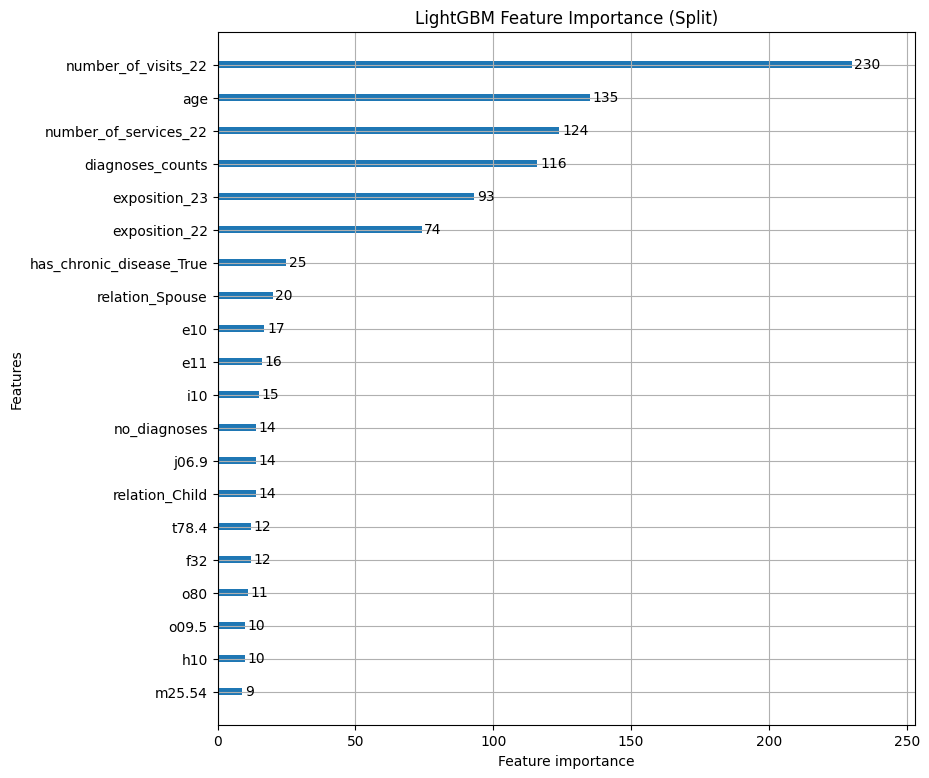

In [123]:
plot_importance(clf_lgbm.best_estimator_, importance_type="split",
                    figsize=(9,9), title="LightGBM Feature Importance (Split)", max_num_features=20)
plt.show()

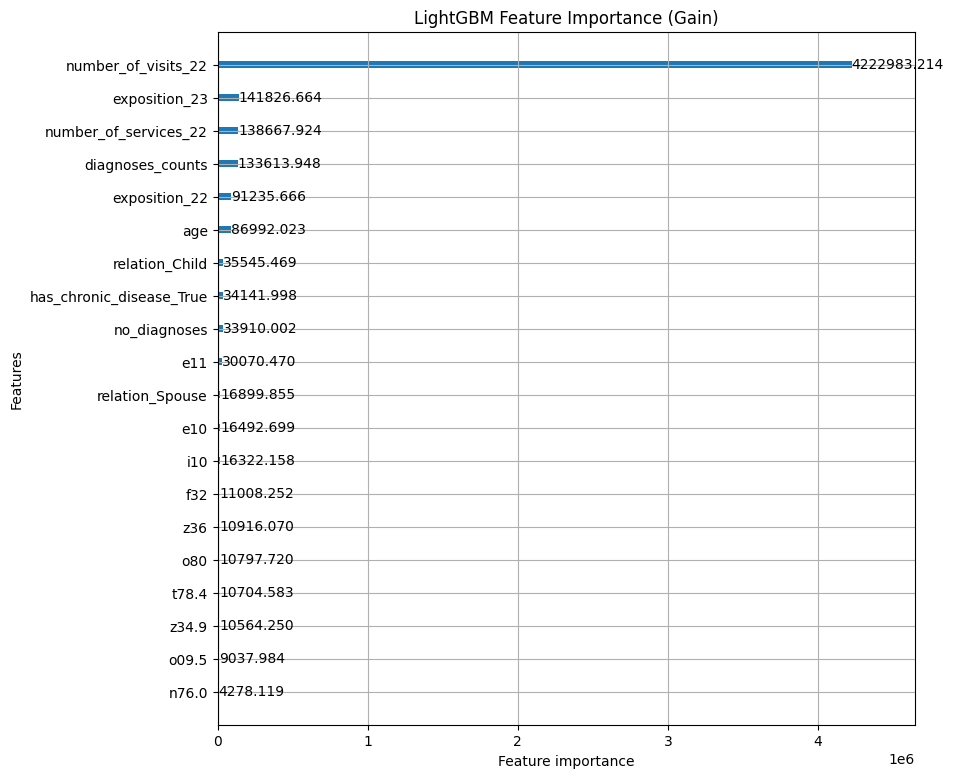

In [124]:
plot_importance(clf_lgbm.best_estimator_, importance_type="gain",
                    figsize=(9,9), title="LightGBM Feature Importance (Gain)", max_num_features=20)
plt.show()

In [125]:
feature_importances = pd.Series(clf_lgbm.best_estimator_.feature_importances_, index=column_trans.get_feature_names_out())

In [126]:
feature_importances.sort_values(ascending=False).head(30)

number_of_visits_22         230
age                         135
number_of_services_22       124
diagnoses_counts            116
exposition_23                93
exposition_22                74
has_chronic_disease_True     25
relation_Spouse              20
e10                          17
e11                          16
i10                          15
relation_Child               14
j06.9                        14
no_diagnoses                 14
f32                          12
t78.4                        12
o80                          11
h10                          10
o09.5                        10
gender_Female                 9
m25.54                        9
g40                           8
o09.3                         8
r10                           7
h18.6                         7
n76.0                         7
z36                           7
z34.9                         7
z38.0                         7
m60                           7
dtype: int32

### 9.8. <a id='toc9_8_'></a>[Заключение](#toc0_)

Самым важным признаком предсказуемо оказался `number_of_visits_22`. Я подозреваю, что если убрать `number_of_services_22`, то его значимость тоже добавится к нему. Интересно, что несмотря на число ветвлений выше у `number_of_services_22, diagnoses_counts` и `age`, прибавка точности выше за счёт `exposition_23`.

`Relation` играет некоторую роль в принятии решений, но не `nationality` и не `network`. В целом ожидаемо учитывая дисбаланс.

Значительное число ветвлений сделано на основе токенов - болезней, возможно это полезно для определение наиболее опасных заболеваний.

## 10. <a id='toc10_'></a>[Финальный замер качества](#toc0_)

In [127]:
feat_full = pd.concat([feat_train, feat_test])
feat_full_trans = column_trans.fit_transform(feat_full)
feat_full_trans

<49998x6240 sparse matrix of type '<class 'numpy.float64'>'
	with 689195 stored elements in Compressed Sparse Row format>

In [128]:
targ_full = pd.concat([targ_train, targ_test])
targ_full

insured_pin
1489111     0
1504934     0
1531337     0
1408159     8
1522775    23
           ..
1440353     1
1545110     5
1464088     9
1347640     3
1370823    13
Name: number_of_visits_23, Length: 49998, dtype: int64

In [129]:
feat_holdout_trans = column_trans.transform(feat_holdout)
feat_holdout_trans

<10000x6240 sparse matrix of type '<class 'numpy.float64'>'
	with 137971 stored elements in Compressed Sparse Row format>

In [130]:
holdout_params = clf_lgbm.best_estimator_.get_params()
holdout_params.pop("random_state")
holdout_params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'num_leaves': 50,
 'objective': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [131]:
holdout_model = LGBMRegressor(verbose=2, random_state=RANDOM, **holdout_params)

In [132]:
holdout_model.fit(feat_full_trans, targ_full)

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.994806
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.990960
[LightGBM] [Debug] init for col-wise cost 0.069575 seconds, init for row-wise cost 0.079582 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 3181
[LightGBM] [Info] Number of data points in the train set: 49998, number of used features: 1178
[LightGBM] [Info] Start training from score 5.892256
[LightGBM] [Debug] Trained a tree with leaves = 16 and depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 16 and depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 16 and depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 16 and depth = 4
[LightGBM] [Debug] Trained a 

LGBMRegressor(max_depth=4, n_estimators=150, num_leaves=50,
              random_state=20240804, verbose=2)

In [133]:
train.columns

Index(['insured_network', 'nationality', 'gender', 'relation', 'dob',
       'diagnoses', 'has_chronic_disease', 'exposition_22',
       'number_of_visits_22', 'number_of_services_22', 'exposition_23',
       'number_of_visits_23'],
      dtype='object')

In [134]:
holdout_pred = pd.Series(holdout_model.predict(feat_holdout_trans), index=(feat_holdout.index), name='number_of_visits_23')
holdout_pred.to_csv('holdout_pred.csv')
holdout_pred

Insured_PIN
1516424      2.157946
22210474     4.532833
1518945      6.080328
1344077      7.479994
1354276      4.793158
              ...    
3948786     10.221633
67038285    10.130148
1371592      3.249993
62818434     2.441623
1384402     24.899270
Name: number_of_visits_23, Length: 10000, dtype: float64

In [135]:
pd.read_csv('holdout_pred.csv')

,Insured_PIN,number_of_visits_23
0,1516424,2.157946
1,22210474,4.532833
2,1518945,6.080328
3,1344077,7.479994
4,1354276,4.793158
...,...,...
9995,3948786,10.221633
9996,67038285,10.130148
9997,1371592,3.249993
9998,62818434,2.441623


**Заключение:** Данные собраны обратно, заново трансформированы и на их основании обучена модель. Предсказания по `holdout` выгружены в файл. 

*Спасибо за знакомство с проектом.*



In [136]:
feature_importances.sort_values(ascending=False).to_csv('feature_importances.csv')